In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/데청캠 프로젝트/dataset/시군구별_인프라수_청년수.csv'
df = pd.read_csv(path, encoding='cp949')
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
#!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
df_set = df.drop(['시군구'], axis=1)
df_set['청년인구'] = df_set['청년인구'].str.replace(",","")
df_set = df_set.astype('float64')

In [ ]:
# 정규화
fitted_df = std_scaler.fit_transform(df_set)

In [ ]:
# Bartlett의 테스트
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(fitted_df)
chi_square_value, p_value

(617.1692364244824, 2.590786945110335e-68)

In [ ]:
# Kaiser-Meyer-Olkin (KMO)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fitted_df)
kmo_model

0.6606130919216785

In [ ]:
fa = FactorAnalyzer(n_factors=16,rotation=None)
fa.fit(fitted_df)

#Eigen값 체크 
ev, v = fa.get_eigenvalues()
ev

array([5.2700595 , 1.7606826 , 1.52704054, 1.2713431 , 1.14708316,
       0.94413123, 0.86777962, 0.77230599, 0.6637638 , 0.47928589,
       0.40979995, 0.28256672, 0.24308995, 0.1859796 , 0.13781661,
       0.03727174])

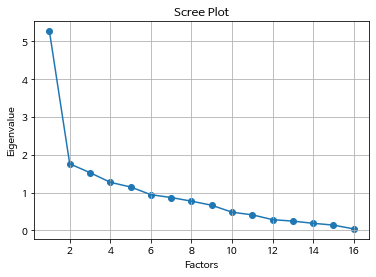

In [ ]:
plt.scatter(range(1,fitted_df.shape[1]+1),ev)
plt.plot(range(1,fitted_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=2, rotation="varimax") #ml : 최대우도 방법
fa.fit(fitted_df)
efa_result= pd.DataFrame(fa.loadings_, index=df_set.columns)
efa_result

,0,1
청년인구,0.872654,-0.124247
병원,0.782864,0.243645
사회스포츠,0.553081,-0.071311
대학교,0.243834,-0.024458
초중고,0.804635,-0.221008
공항,0.018804,-0.074606
소방서,0.306063,0.010698
경찰서,0.537277,0.616313
소형상업시설(음식점_카페_학원_편의점),0.920194,0.212814
대형상업시설,0.543324,0.316189


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


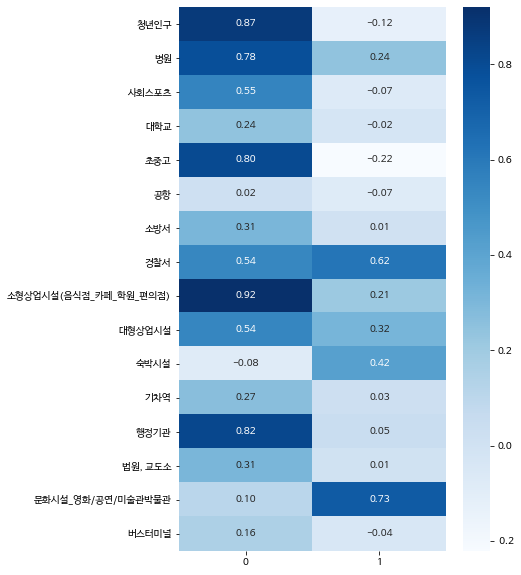

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
df_set = df.drop(['시군구',  '대학교',  '공항', '소방서', '기차역',  '법원, 교도소', '버스터미널','숙박시설'], axis=1)
df_set['청년인구'] = df_set['청년인구'].str.replace(",","")
df_set = df_set.astype('float64')
fitted_df = std_scaler.fit_transform(df_set)

In [ ]:
# Bartlett의 테스트
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(fitted_df)
chi_square_value, p_value

(476.745180687621, 1.0898286883944817e-78)

In [ ]:
# Kaiser-Meyer-Olkin (KMO)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fitted_df)
kmo_model

0.7672909019313723

In [ ]:
fa = FactorAnalyzer(n_factors=8,rotation=None)
fa.fit(fitted_df)

#Eigen값 체크 
ev, v = fa.get_eigenvalues()
ev

array([4.90601038, 1.46274932, 0.79596485, 0.66084872, 0.3988775 ,
       0.28664773, 0.25052447, 0.18122158, 0.05715544])

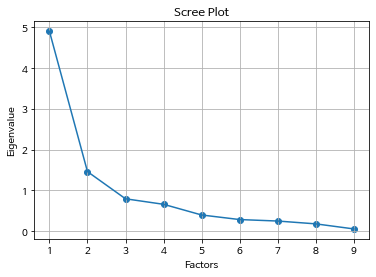

In [ ]:
plt.scatter(range(1,fitted_df.shape[1]+1),ev)
plt.plot(range(1,fitted_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax") #ml : 최대우도 방법
fa.fit(fitted_df)
efa_result= pd.DataFrame(fa.loadings_, index=df_set.columns)
efa_result

,0,1,2
청년인구,0.601582,0.620727,0.011508
병원,0.855980,0.296173,0.190629
사회스포츠,0.351023,0.418732,0.006601
초중고,0.185223,0.982377,0.026512
경찰서,0.359307,0.299082,0.610355
소형상업시설(음식점_카페_학원_편의점),0.724364,0.537015,0.238927
대형상업시설,0.655917,0.159436,0.181903
행정기관,0.527079,0.607029,0.164009
문화시설_영화/공연/미술관박물관,0.079898,-0.104897,0.982991


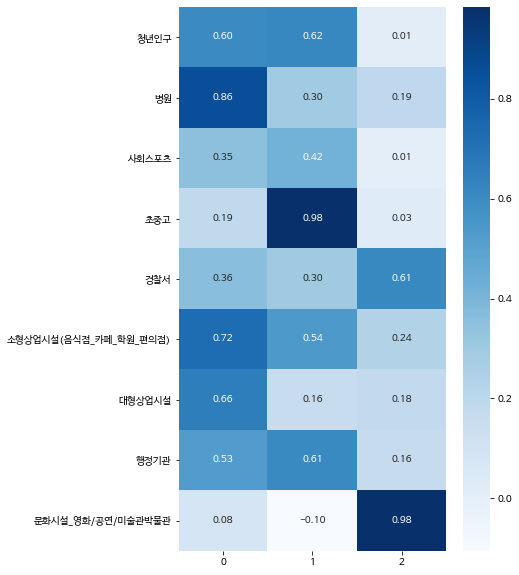

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
%%shell
jupyter nbconvert --to html /content/FA_with_StandardScaler.ipynb

[NbConvertApp] Converting notebook /content/FA_with_StandardScaler.ipynb to html
[NbConvertApp] Writing 403978 bytes to /content/FA_with_StandardScaler.html
